# Fashion MNIST Classification with CNN ( v2 )

Fashion MNIST is a popular dataset that consists of grayscale images of 10 different types of clothing items, such as T-shirts, trousers, dresses, sneakers, etc.

his project, we will create a more sophisticated Convolutional Neural Network (CNN) model for classifying the Fashion MNIST dataset. Our primary focus will be on achieving a higher accuracy through various techniques including advanced architecture design, data augmentation, and model optimization.

# Importing Libraries :

NumPy: NumPy is package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical functions to operate on these arrays efficiently.It is widely used for tasks such as numerical computations, data manipulation, and linear algebra operations.

pandas: pandas is a powerful data manipulation and analysis library for Python. It offers data structures like DataFrames and Series, which allow you to store, manipulate, and analyze tabular data easily. pandas provides tools for data cleaning, transformation, aggregation, and exploration, making it an essential library for working with structured data.

Matplotlib: Matplotlib is a popular plotting library that enables you to create a wide range of static, animated, and interactive visualizations. It provides a MATLAB-like interface and supports various types of plots, including line plots, scatter plots, bar plots, histograms, and more. Matplotlib gives you extensive control over plot customization, including labels, colors, legends, and annotations, allowing you to effectively communicate insights from your data

Seaborn: Seaborn is a statistical data visualization library built on top of Matplotlib. It offers a higher-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the process of creating complex visualizations, such as heatmaps, violin plots, and pair plots, by providing high-level functions with sensible default settings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset from keras.datasets :

The Fashion MNIST dataset consists of grayscale images representing 10 fashion categories, each with 28x28 pixels. It includes 60,000 training and 10,000 test samples, serving as a benchmark for testing image classification algorithms. While not comprehensive, it aids in developing and comparing machine learning techniques and is widely accessible through libraries.

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# Splitting Dataset into Train - Test :

Splitting the data refers to dividing the dataset into separate subsets for training, validation, and testing purposes. This division is essential to assess the performance of a machine learning model on unseen data and prevent overfitting. Here are the common types of data splits:

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

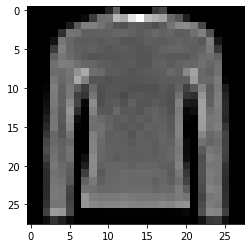

In [6]:
plt.imshow(x_train[37], cmap = 'gray')

In [7]:
x_train.max(), x_train.min()

(255, 0)

# Normalizing :

Normalizing a dataset involves scaling the data values to a common range, often between 0 and 1. For the Fashion MNIST dataset, this means dividing each pixel value by 255 to transform it into the [0, 1] range. This ensures consistent and optimal data representation for machine learning algorithms.

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# Reshaping : 

Reshaping in the context of the Fashion MNIST dataset involves transforming the 2D grid of image pixels into a format suitable for machine learning. This can include flattening the image into a 1D array or maintaining the 2D structure, depending on the algorithm's requirements.

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [11]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Encoding :

Converting labels to categorical means representing class labels as binary vectors, where each class is uniquely identified by a 'hot' (1) bit while the rest are 'cold' (0). This transformation is used for multi-class classification tasks like Fashion MNIST to make labels compatible with machine learning algorithms.

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [14]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Validation Split :

Validation split involves creating a subset from the training data for evaluating and fine-tuning the model before testing, aiding in preventing overfitting and optimizing performance.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, 
                                                      y_train_categorical, 
                                                      test_size = 0.2, 
                                                      random_state = 42)

In [18]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Building Model :

To build a model for the Fashion MNIST classification project, a Convolutional Neural Network (CNN) is crafted. This architecture involves stacking convolutional and pooling layers for feature extraction, followed by fully connected layers for classification. The model is compiled with an optimizer (e.g., Adam), categorical cross-entropy loss, and accuracy metric to guide training. This design enables the model to effectively learn and classify fashion items from the dataset

In [19]:
num_classes = 10

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

In [23]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'linear',input_shape = (28,28,1)))
mnist_model.add(LeakyReLU(alpha = 0.1))
mnist_model.add(MaxPooling2D((2, 2), padding = 'same'))
mnist_model.add(Dropout(0.25))

mnist_model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'linear'))
mnist_model.add(LeakyReLU(alpha = 0.1))
mnist_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
mnist_model.add(Dropout(0.25))

mnist_model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'linear'))
mnist_model.add(LeakyReLU(alpha = 0.1))                  
mnist_model.add(MaxPooling2D(pool_size = (2, 2),padding = 'same'))
mnist_model.add(Dropout(0.4))

mnist_model.add(Flatten())

mnist_model.add(Dense(128, activation = 'linear'))
mnist_model.add(LeakyReLU(alpha = 0.1))           
mnist_model.add(Dropout(0.3))

mnist_model.add(Dense(num_classes, activation = 'softmax'))

In [24]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                        

# Compiling Model :

Compiling the model for the Fashion MNIST classification project entails configuring the model's learning process. This involves selecting a loss function to measure prediction accuracy, choosing an optimizer to update model parameters, and specifying evaluation metrics such as accuracy to monitor its performance. This setup readies the model for effective training, guiding its adjustments towards making accurate predictions on the Fashion MNIST dataset.

In [25]:
mnist_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training Model :

To train a model for the Fashion MNIST classification project, you load and preprocess the dataset, create a CNN model architecture, compile it with loss and optimizer, train the model using the training data while monitoring validation, and evaluate its accuracy on the test set.

In [26]:
history = mnist_model.fit(x_train, y_train ,
                          batch_size = 64, 
                          epochs = 20, 
                          validation_data = (x_valid, y_valid))

Epoch 1/20
750/750 [==============================] - 88s 111ms/step - loss: 0.6029 - accuracy: 0.7748 - val_loss: 0.3698 - val_accuracy: 0.8615
Epoch 2/20
750/750 [==============================] - 87s 116ms/step - loss: 0.3810 - accuracy: 0.8607 - val_loss: 0.3048 - val_accuracy: 0.8855
Epoch 3/20
750/750 [==============================] - 95s 127ms/step - loss: 0.3296 - accuracy: 0.8775 - val_loss: 0.2739 - val_accuracy: 0.8953
Epoch 4/20
750/750 [==============================] - 119s 158ms/step - loss: 0.2997 - accuracy: 0.8898 - val_loss: 0.2514 - val_accuracy: 0.9051
Epoch 5/20
750/750 [==============================] - 117s 156ms/step - loss: 0.2846 - accuracy: 0.8943 - val_loss: 0.2481 - val_accuracy: 0.9065
Epoch 6/20
750/750 [==============================] - 115s 154ms/step - loss: 0.2666 - accuracy: 0.9005 - val_loss: 0.2335 - val_accuracy: 0.9134
Epoch 7/20
750/750 [==============================] - 112s 149ms/step - loss: 0.2555 - accuracy: 0.9042 - val_loss: 0.2336 - va

In [27]:
evaluation_test = mnist_model.evaluate(x_test, y_test_categorical, verbose = 0)

In [28]:
print("Accuracy = ", evaluation_test[1])
print("Loss = ", evaluation_test[0])

Accuracy =  0.9200999736785889
Loss =  0.22763130068778992


In [29]:
mnist_model.save('fashionMNIST_classifier_v3.h5')

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Learning Curve :

A learning curve illustrates how a model's performance evolves as it's trained on increasing amounts of data. It helps assess whether the model is overfitting (high training accuracy but low validation/test accuracy) or underfitting (both training and validation/test accuracy are low).

# Accuracy Curve :

An accuracy curve illustrates how a model's accuracy changes over epochs during training. Higher accuracy indicates better performance. Plotting training and validation accuracy helps identify overfitting (training accuracy much higher than validation) or convergence (both stabilize). For the Fashion MNIST project, design a CNN, compile it, train, and plot accuracy over epochs to optimize the model's performance.

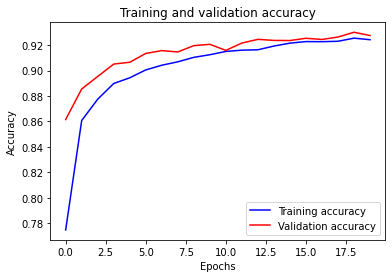

In [32]:
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve :

A loss curve represents how a model's error changes during training. It helps monitor convergence and identify overfitting. For the Fashion MNIST project, design a CNN, compile it, train over epochs, and plot the training and validation loss.

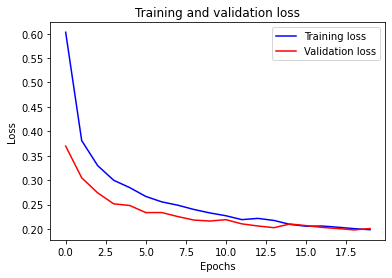

In [33]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [36]:
predictions = mnist_model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)

313/313 [==============================] - 7s 22ms/step


# Error Analysis :

Error analysis for the Fashion MNIST project entails examining misclassified samples to uncover patterns and weaknesses. This informs adjustments to the model's architecture, parameters, or data preprocessing. Iterative refinement through techniques like data augmentation and fine-tuning helps enhance the model's performance.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(predicted_classes, y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       957
           1       0.99      0.99      0.99       995
           2       0.85      0.89      0.87       954
           3       0.95      0.90      0.92      1050
           4       0.88      0.87      0.87      1012
           5       0.98      0.99      0.99       995
           6       0.78      0.75      0.76      1032
           7       0.98      0.95      0.97      1033
           8       0.98      0.99      0.99       993
           9       0.96      0.98      0.97       979

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [40]:
confusion_matrix = confusion_matrix(predicted_classes, y_test)

In [41]:
confusion_matrix

array([[854,   0,  15,   7,   0,   0,  78,   0,   3,   0],
       [  0, 986,   1,   5,   0,   0,   2,   0,   1,   0],
       [ 13,   0, 853,   9,  27,   0,  49,   0,   2,   1],
       [ 14,   9,   9, 946,  41,   0,  31,   0,   0,   0],
       [  3,   2,  62,   9, 876,   0,  60,   0,   0,   0],
       [  2,   0,   0,   0,   0, 984,   0,   2,   2,   5],
       [111,   1,  60,  24,  56,   0, 776,   0,   4,   0],
       [  0,   0,   0,   0,   0,  15,   0, 981,   4,  33],
       [  3,   2,   0,   0,   0,   0,   4,   0, 984,   0],
       [  0,   0,   0,   0,   0,   1,   0,  17,   0, 961]], dtype=int64)

<AxesSubplot:>

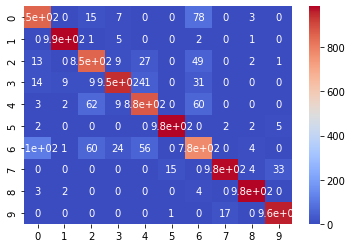

In [42]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'coolwarm')

# Prediction :

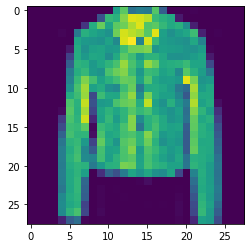

In [38]:
test_prediction = x_test[10]
plt.imshow(test_prediction.reshape(28,28))

In [39]:
predictions = mnist_model.predict(test_prediction.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 102ms/step
Predicted class: 4


# Thanks !